In [1]:
import matplotlib.pyplot as plt
import numpy as np
# command for showing matplotlib plots within the jupyter notebook
%matplotlib inline
import pandas as pd # utilities for parsing input files
import seaborn as sns

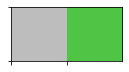

In [6]:
dr = pd.read_excel('../data/final_figures_input/Fig2.xlsx', sheet_name=0, header=1)

DPI = 600

# Color palette stuff

special = "#50C444"
not_special = "#BDBDBD" 

class_colors = [not_special, special]
sns.set_palette(class_colors)
sns.palplot(sns.color_palette())

In [7]:
dr

,Dosage response,Frequency,special
0,0,0,n
1,0.05,3,n
2,0.1,16,n
3,0.15,14,n
4,0.2,24,n
...,...,...,...
206,10.3,0,n
207,10.35,0,n
208,10.4,0,n
209,10.45,0,n


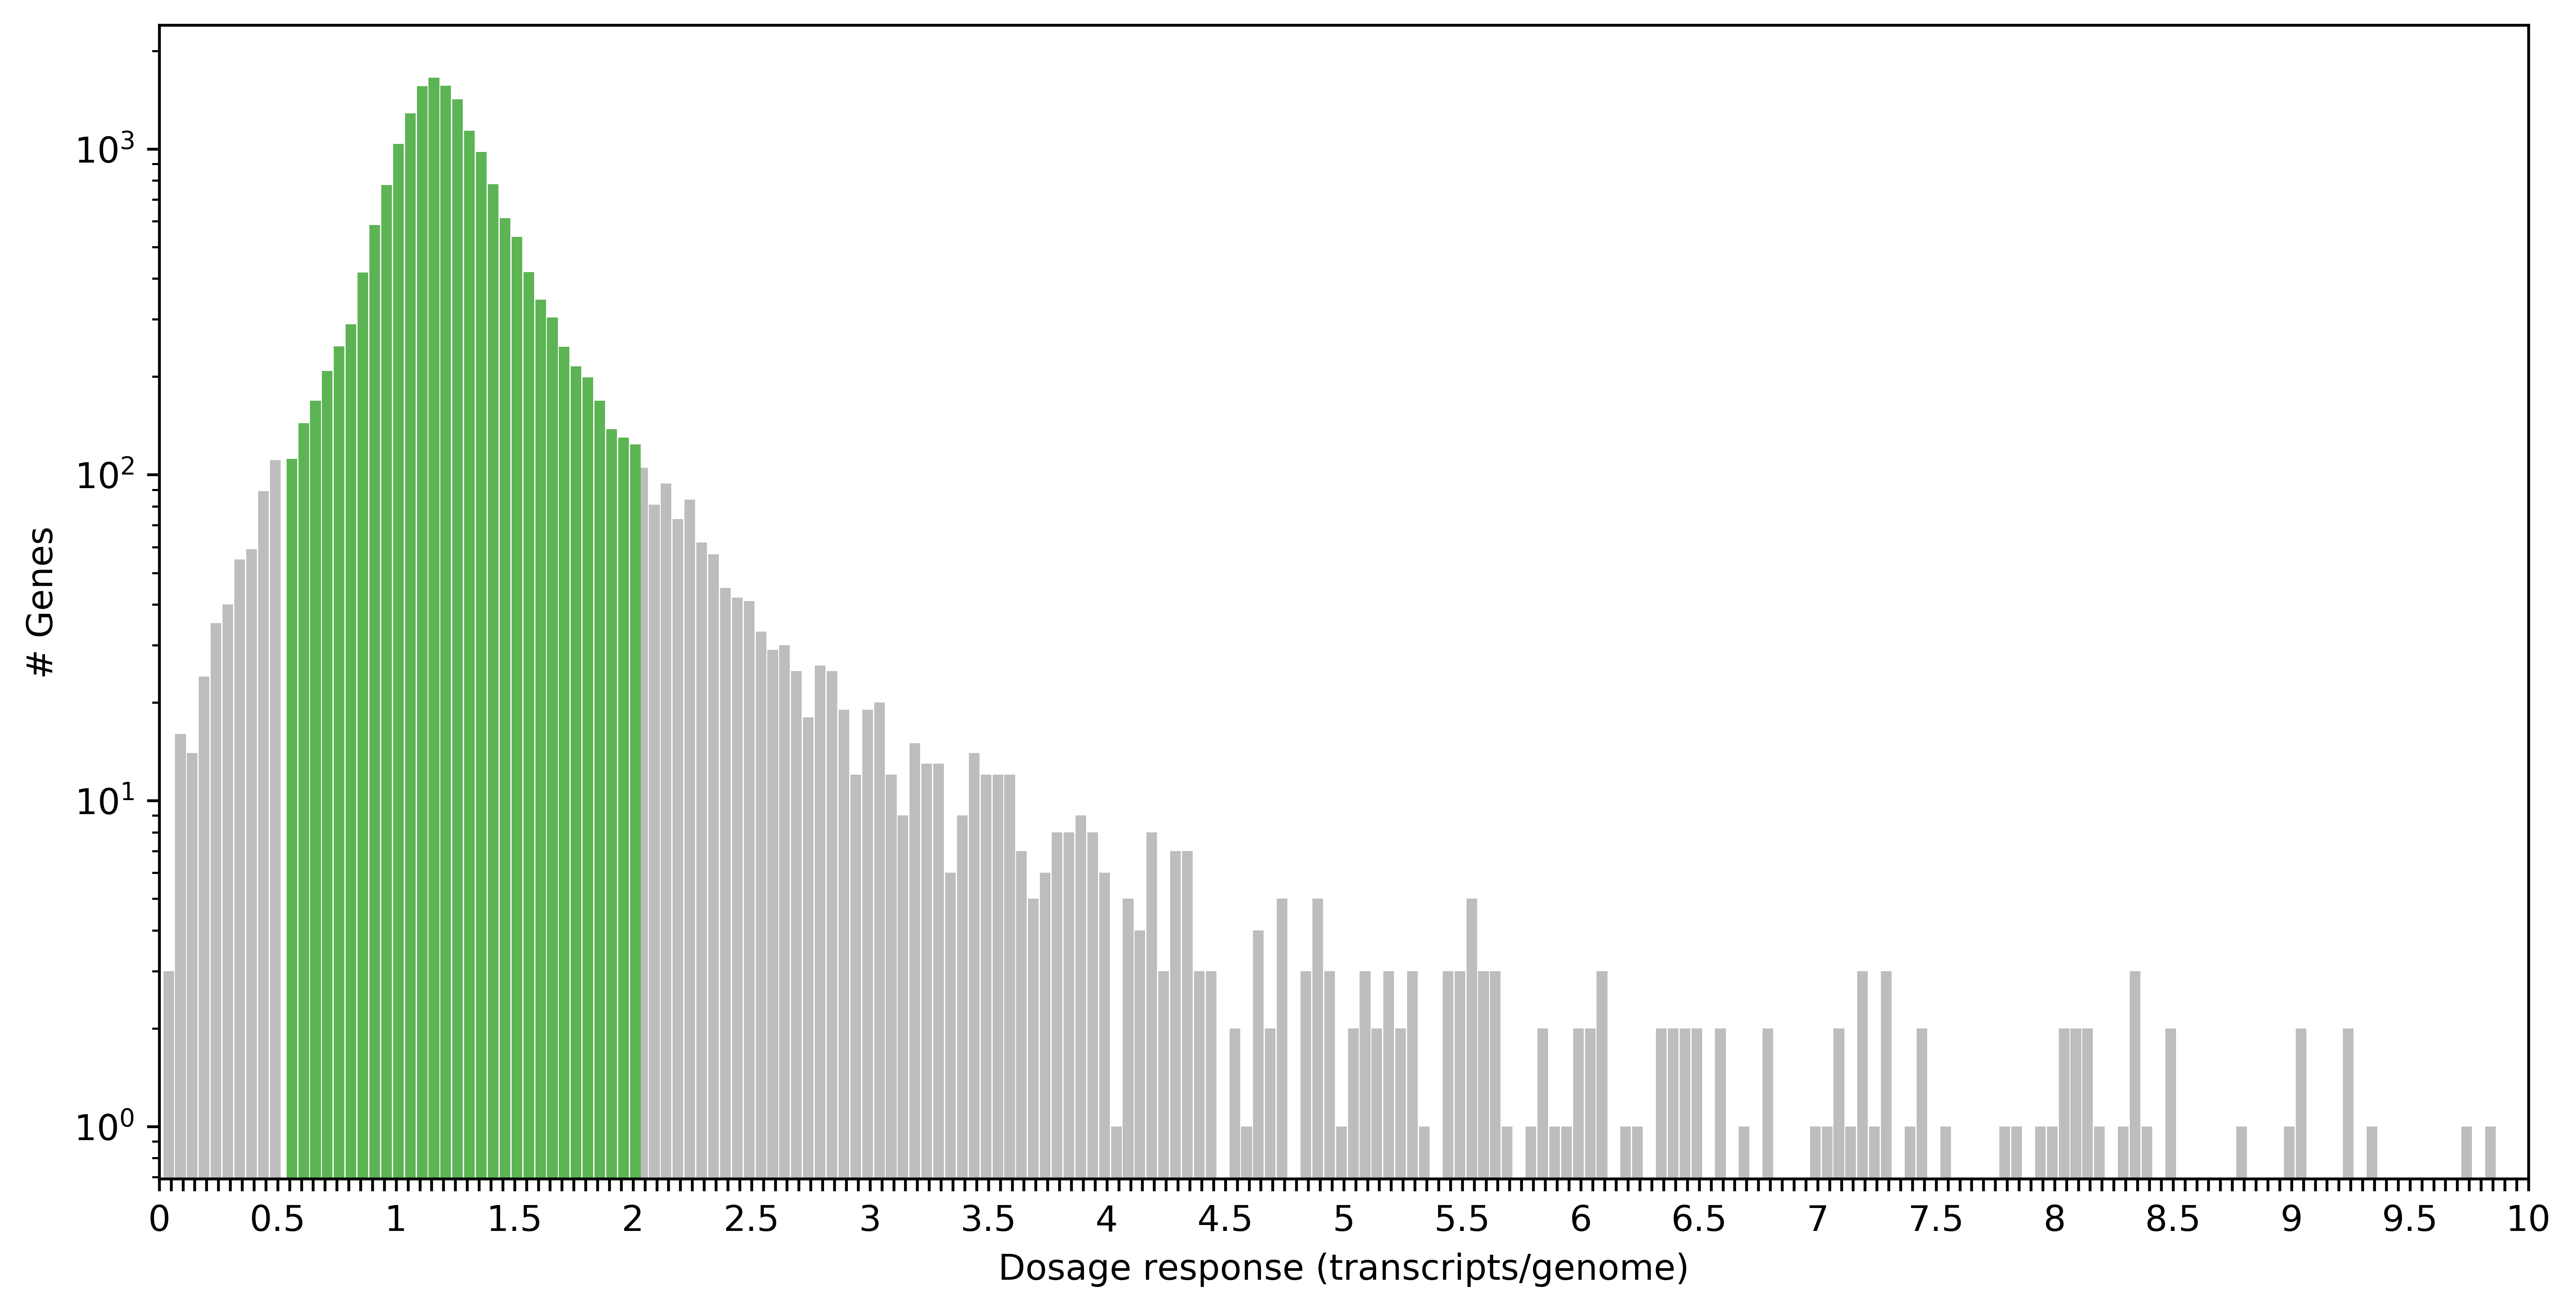

In [12]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,6), dpi=DPI, sharex=True)

ax1 = sns.barplot(data=dr,
                    x="Dosage response",
                    y="Frequency",
                    hue="special")

ax1.set_yscale("log")

every_nth = 10
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax1, .9)

ax1.get_legend().remove()
ax1.set_xlim(0,200.)

ax1.set_xlabel("Dosage response (transcripts/genome)")
ax1.set_ylabel("# Genes")

plt.savefig('../figures/Figure2.png')